In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KernelDensity
import pickle
import random


# Taste

In [2]:
with open(~'/BayesScores_taste_nowater_alphapoint875.pkl', 'rb') as f:
    neuron_vs_score = pickle.load(f)

In [3]:
threshold = np.percentile(neuron_vs_score[:, 1], 80)

# Filter the array based on the threshold
filtered_array = neuron_vs_score[neuron_vs_score[:, 1] >= threshold]


In [4]:
top20taste = filtered_array

In [5]:
taste_nonzero_results =pd.read_pickle(
~'/BA_nonzeroresultsDF_taste_nowater_alphapoint875.pkl')


In [6]:
len(taste_nonzero_results)

42862

In [7]:
excluded_numbers = [num for num in range(433) if all(num != row[0] for row in top20taste)]
len(excluded_numbers)

354

In [8]:
#get rid of all the trials from neurons which don't appear in the top 20%
# Assuming top20score is a 2D array (list of lists)


taste_nonzero_results = taste_nonzero_results[~taste_nonzero_results['Neuron'].isin(excluded_numbers)]

In [9]:
len(taste_nonzero_results)

14688

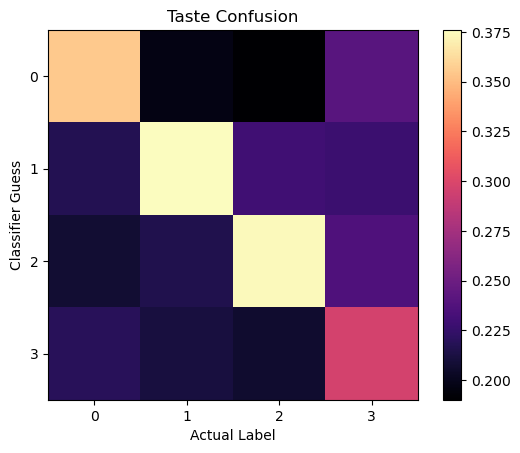

In [10]:
# confusion matrix creation:
taste_conf_matrix= np.zeros(shape=(4,4))
for actual in range(len(taste_nonzero_results['Taste'].unique())):
    xDF = taste_nonzero_results[(taste_nonzero_results['Taste'] == actual)]
    for guess in range(len(taste_nonzero_results['Taste'].unique())):
        taste_conf_matrix[guess, actual] = (xDF[guess].sum())/(xDF['count'].sum())
        
plt.imshow(taste_conf_matrix, cmap='magma')

plt.title('Taste Confusion')
plt.xlabel('Actual Label')
plt.ylabel('Classifier Guess')

plt.xticks(np.arange(len(taste_conf_matrix)), [0,1,2,3])
plt.yticks(np.arange(len(taste_conf_matrix)), [0,1,2,3])

#plt.tick_params(axis='x', which='both', labelbottom=False, labeltop=True)
#plt.clim(0.0,0.15)
plt.colorbar()
plt.show()

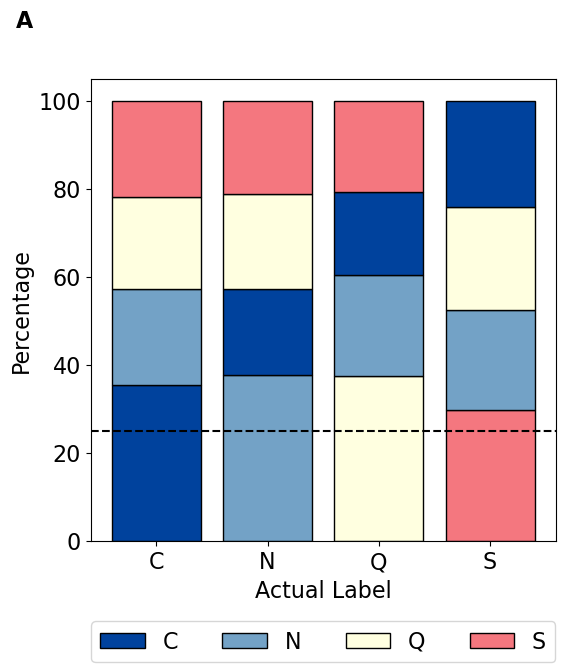

In [11]:
# Calculate percentages
percentages = taste_conf_matrix / taste_conf_matrix.sum(axis=0, keepdims=True) * 100
percentages[1][1], percentages[0][1], percentages[2][2], percentages[0][2] = \
    percentages[0][1], percentages[1][1], percentages[0][2], percentages[2][2]
percentages[3][3], percentages[0][3] = percentages[0][3], percentages[3][3]

# Create a stacked bar chart
num_bars = taste_conf_matrix.shape[1]
bar_width = 0.8  # You can adjust this based on your preference

fig, ax = plt.subplots(figsize=(6,6))

bottom = np.zeros(taste_conf_matrix.shape[0])

# Custom color palette with five colors
colors = [['#00429d', '#73a2c6', '#ffffe0', '#f4777f'],
          ['#73a2c6', '#00429d', '#73a2c6', '#73a2c6'],
          ['#ffffe0', '#ffffe0', '#00429d', '#ffffe0'],
          ['#f4777f', '#f4777f', '#f4777f', '#00429d'],
          ['#93003a', '#93003a', '#93003a', '#93003a']]

# Legend labels for each color
legend_labels = ['C', 'N', 'Q', 'S']

for i in range(num_bars):
    ax.bar(range(taste_conf_matrix.shape[0]), percentages[i, :], bottom=bottom, color=colors[i], edgecolor='black', label=legend_labels[i])
    bottom += percentages[i, :]

ax.set_xticks(np.arange(taste_conf_matrix.shape[0]))
ax.set_xticklabels(['C', 'N', 'Q', 'S'], fontsize=16)

# Add a horizontal dashed line at height 0.33
ax.axhline(y=25, color='black', linestyle='--')
ax.text(-0.16, 1.15, 'A', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
# Place the legend underneath the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_bars, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual Label', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
#plt.title('Classifier Confusion: Taste (top 20%, alpha=0.500)')

plt.show()


# 3 taste experiments

for each of the three taste experiments, adjust the file name, colors, and lables s.t. they correspond to the correct stimuli

In [19]:
with open(~'/BayesScores_taste_013_alphapoint875.pkl', 'rb') as f:
    neuron_vs_score = pickle.load(f)

In [20]:
threshold = np.percentile(neuron_vs_score[:, 1], 80)

# Filter the array based on the threshold
filtered_array = neuron_vs_score[neuron_vs_score[:, 1] >= threshold]


In [21]:
top20taste = filtered_array

In [22]:
taste_nonzero_results =pd.read_pickle(
~'/BA_nonzeroresultsDF_taste_013_alphapoint875.pkl')


In [23]:
taste_nonzero_results['Taste'].unique()

array([0, 1, 2])

In [24]:
excluded_numbers = [num for num in range(433) if all(num != row[0] for row in top20taste)]
len(excluded_numbers)

354

In [25]:
#get rid of all the trials from neurons which don't appear in the top 20%
# Assuming top20score is a 2D array (list of lists)


taste_nonzero_results = taste_nonzero_results[~taste_nonzero_results['Neuron'].isin(excluded_numbers)]

In [26]:
len(taste_nonzero_results)

10800

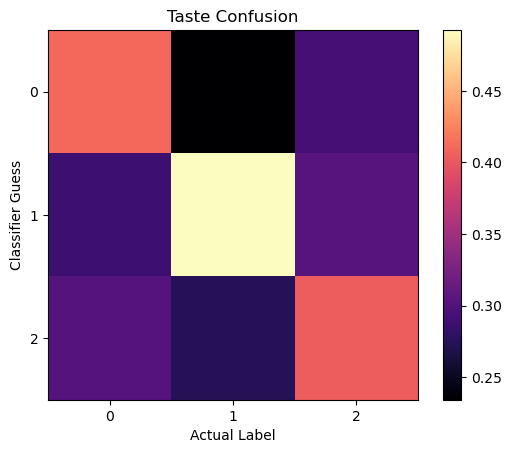

In [27]:
# confusion matrix creation:
taste_conf_matrix= np.zeros(shape=(3,3))
for actual in range(len(taste_nonzero_results['Taste'].unique())):
    xDF = taste_nonzero_results[(taste_nonzero_results['Taste'] == actual)]
    for guess in range(len(taste_nonzero_results['Taste'].unique())):
        taste_conf_matrix[guess, actual] = (xDF[guess].sum())/(xDF['count'].sum())
        
plt.imshow(taste_conf_matrix, cmap='magma')

plt.title('Taste Confusion')
plt.xlabel('Actual Label')
plt.ylabel('Classifier Guess')

plt.xticks(np.arange(len(taste_conf_matrix)), [0,1,2])
plt.yticks(np.arange(len(taste_conf_matrix)), [0,1,2])

#plt.tick_params(axis='x', which='both', labelbottom=False, labeltop=True)
#plt.clim(0.0,0.15)
plt.colorbar()
plt.show()

In [29]:
percentages

array([[41.0885989 , 49.23984381, 40.43847875],
       [28.70020604, 23.42776439, 30.34451902],
       [30.21119505, 27.33239179, 29.21700224]])

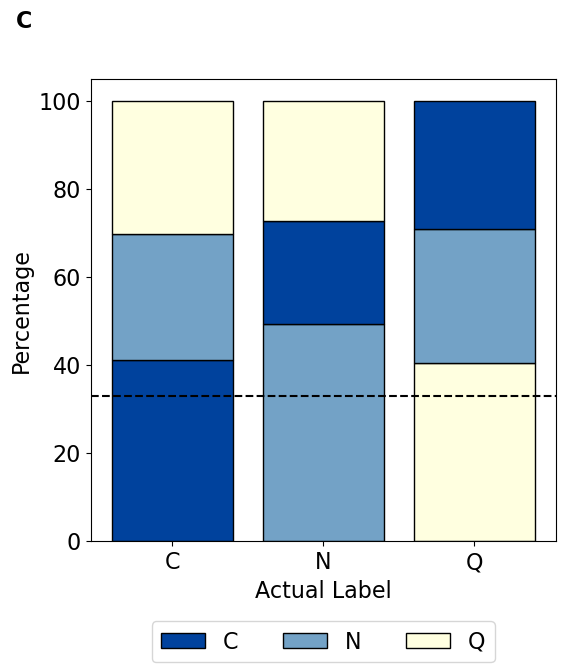

In [28]:
# Calculate percentages
percentages = taste_conf_matrix / taste_conf_matrix.sum(axis=0, keepdims=True) * 100
percentages[1][1], percentages[0][1], percentages[2][2], percentages[0][2] = \
    percentages[0][1], percentages[1][1], percentages[0][2], percentages[2][2]

# Create a stacked bar chart
num_bars = taste_conf_matrix.shape[1]
bar_width = 0.8  # You can adjust this based on your preference

fig, ax = plt.subplots(figsize=(6,6))

bottom = np.zeros(taste_conf_matrix.shape[0])

# Custom color palette with five colors
colors = [['#00429d', '#73a2c6', '#ffffe0', '#f4777f'],
          ['#73a2c6', '#00429d', '#73a2c6', '#73a2c6'],
          ['#ffffe0', '#ffffe0', '#00429d', '#ffffe0'],
          ['#f4777f', '#f4777f', '#f4777f', '#00429d']]

# Legend labels for each color
legend_labels = ['C', 'N', 'Q']

for i in range(num_bars):
    ax.bar(range(taste_conf_matrix.shape[0]), percentages[i, :], bottom=bottom, color=colors[i], edgecolor='black', label=legend_labels[i])
    bottom += percentages[i, :]

ax.set_xticks(np.arange(taste_conf_matrix.shape[0]))
ax.set_xticklabels(['C', 'N', 'Q'], fontsize=16)

# Add a horizontal dashed line at height 0.33
ax.axhline(y=33, color='black', linestyle='--')
ax.text(-0.16, 1.15, 'C', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
# Place the legend underneath the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_bars, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual Label', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
#plt.title('Classifier Confusion: Taste (top 20%, alpha=0.500)')

plt.show()


# Temperature:

- open the file which has the filtered neuron_vs_score array (s.t. the top 20% of neurons re:score are the only ones that matter)
- sort my temp_nonzero results matrix to only include neurons in the above list
- then make confusion matrix
- then make bar chart 

In [2]:
with open(~'/BayesScores_TempDat_temps_alphapoint875_pbw15.pkl', 'rb') as f:
    neuron_vs_score = pickle.load(f)

In [3]:
threshold = np.percentile(neuron_vs_score[:, 1], 80)

# Filter the array based on the threshold
filtered_array = neuron_vs_score[neuron_vs_score[:, 1] >= threshold]
#np.save('temps_top20percent_alphapoint500_neuronVSscore.npy', filtered_array)

In [14]:
filtered_array[:,0]

array([  0.,   3.,   4.,   8.,  12.,  16.,  18.,  19.,  24.,  25.,  26.,
        29.,  32.,  36.,  37.,  44.,  47.,  49.,  52.,  54.,  57.,  63.,
        69.,  70.,  90.,  97., 100., 133., 138., 139., 141., 163., 175.,
       176., 195., 196., 198., 204., 205., 212., 215., 217., 218., 219.,
       221., 227., 230., 232., 242., 246., 251., 255., 256., 258., 259.,
       260., 264., 268., 270., 275., 283., 288., 294., 300., 302., 305.,
       321., 322., 338., 352., 358., 375., 376., 378., 384., 391., 393.,
       394., 396., 399., 402., 404., 408., 410., 411., 416., 421.])

In [15]:
path = '' #fill in appropriately 

neuronDF =pd.read_pickle(f'{path}/NeuronDF.pickle')

In [23]:
info = neuronDF[(neuronDF['Neuron'].isin(filtered_array[:,0])) & (neuronDF['Trial'] == 0) &(neuronDF['Taste'] == 0)]
print(info.iloc[:,:4])

      Recording Type MouseID    Date NeuronID
0             Neuron   CB279  121621    SU_20
3             Neuron   CB279  121621    SU_51
4             Neuron   CB279  121621    SU_54
631           Neuron   CB279  121421    SU_15
635           Neuron   CB279  121421    SU_55
...              ...     ...     ...      ...
31580         Neuron   CB317  110822    SU_51
31582         Neuron   CB317  110822    SU_63
31583         Neuron   CB317  110822    SU_88
33172         Neuron   CB317  111022    SU_13
33177         Neuron   CB317  111022     SU_3

[87 rows x 4 columns]


In [25]:
print(info.iloc[:,:4].to_string())
info.iloc[:,:4].to_csv('info_for_roberto.csv', index=False)

      Recording Type MouseID    Date NeuronID
0             Neuron   CB279  121621    SU_20
3             Neuron   CB279  121621    SU_51
4             Neuron   CB279  121621    SU_54
631           Neuron   CB279  121421    SU_15
635           Neuron   CB279  121421    SU_55
1368          Neuron   CB279  122021    SU_11
1370          Neuron   CB279  122021    SU_19
1371          Neuron   CB279  122021    SU_26
2080          Neuron   CB278  121521    SU_10
2081          Neuron   CB278  121521    SU_12
2082          Neuron   CB278  121521     SU_2
2085          Neuron   CB278  121521    SU_26
2088          Neuron   CB278  121521    SU_41
2928          Neuron   CB278  121721    SU_24
2929          Neuron   CB278  121721    SU_28
2936          Neuron   CB278  121721     SU_4
2939          Neuron   CB278  121721    SU_46
2941          Neuron   CB278  121721    SU_48
2944          Neuron   CB278  121721     SU_9
4512          Neuron   CB278  121921    SU_29
4515          Neuron   CB278  1219

In [4]:
#top20score = np.load('temps_top20percent_alphapoint500_neuronVSscore.npy')
top20score = filtered_array

In [5]:
temp_nonzero_results =pd.read_pickle(~'/BA_nonzeroresultsDF_temps_alphapoint875_pbw15.pkl')

In [7]:
excluded_numbers = [num for num in range(433) if all(num != row[0] for row in top20score)]
len(excluded_numbers)

346

In [8]:
#get rid of all the trials from neurons which don't appear in the top 20%
# Assuming top20score is a 2D array (list of lists)


temp_nonzero_results = temp_nonzero_results[~temp_nonzero_results['Neuron'].isin(excluded_numbers)]

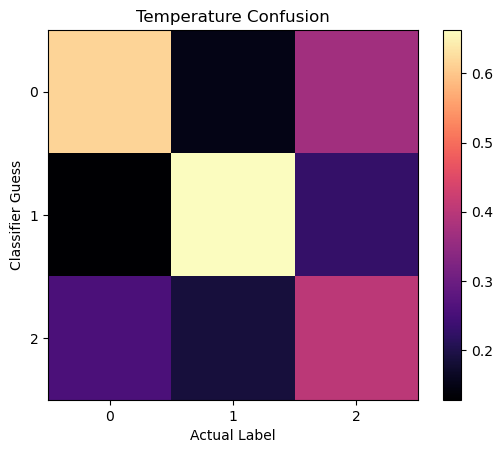

In [38]:
# confusion matrix creation:
conf_matrix= np.zeros(shape=(3,3))
for actual in range(len(temp_nonzero_results['Taste'].unique())):
    xDF = temp_nonzero_results[(temp_nonzero_results['Taste'] == actual)]
    for guess in range(len(temp_nonzero_results['Taste'].unique())):
        conf_matrix[guess, actual] = (xDF[guess].sum())/(xDF['count'].sum())
        
plt.imshow(conf_matrix, cmap='magma')

plt.title('Temperature Confusion')
plt.xlabel('Actual Label')
plt.ylabel('Classifier Guess')

plt.xticks(np.arange(len(conf_matrix)), [0, 1, 2])
plt.yticks(np.arange(len(conf_matrix)), [0, 1, 2])

#plt.tick_params(axis='x', which='both', labelbottom=False, labeltop=True)
#plt.clim(0.0,0.15)
plt.colorbar()
plt.show()

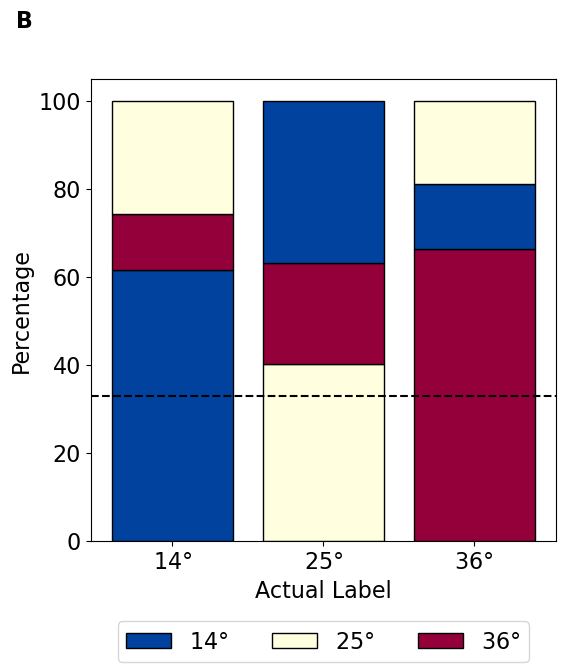

In [39]:
# Calculate percentages
percentages = conf_matrix / conf_matrix.sum(axis=0, keepdims=True) * 100

# Adjust percentages to make the correct guesses appear at the bottom of the plot
percentages[1][1], percentages[0][1], percentages[2][2], percentages[0][2] = \
    percentages[0][1], percentages[1][1], percentages[0][2], percentages[2][2]

percentages[:, [1, 2]] = percentages[:, [2, 1]]

# Create a stacked bar chart
num_bars = conf_matrix.shape[1]
bar_width = 0.2

fig, ax = plt.subplots(figsize=(6,6))

bottom = np.zeros(conf_matrix.shape[0])

# Define colors
colors = [['#00429d', '#ffffe0', '#93003a'],
          ['#93003a', '#93003a', '#00429d'],
          ['#ffffe0', '#00429d', '#ffffe0']]
# ['#00429d', '#93003a', '#ffffe0'] Hex codes for 'Cold', 'Hot', 'Room Temperature'
legend_labels = [r'$14\degree$', r'$36\degree$', r'$25\degree$']
for i in range(num_bars):
    ax.bar(range(conf_matrix.shape[0]), percentages[i, :], bottom=bottom, label=legend_labels[i], color=colors[i],
           edgecolor='black')
    bottom += percentages[i, :]

# Add a horizontal dashed line at height 0.33
ax.axhline(y=33, color='black', linestyle='--')

# Remove the line labeled "Random Guessing" from the legend
handles, labels = ax.get_legend_handles_labels()
handles = [handle for handle, label in zip(handles, labels) if label != 'Random Guessing']

# Swap the order of the last two entries in the legend
handles[-1], handles[-2] = handles[-2], handles[-1]
labels[-1], labels[-2] = labels[-2], labels[-1]

# Add a separate line for the modified legend underneath the plot
ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_bars+1, fontsize=16)
ax.text(-0.16, 1.15, 'B', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax.set_xticks(np.arange(conf_matrix.shape[0]))
ax.set_xticklabels([r'$14\degree$', r'$25\degree$', r'$36\degree$'], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual Label', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
#plt.title('Classifier Confusion: Temperatures (top 20%, alpha=0.500)')

plt.show()